Plotting words using spaCy word2vec and t-SNE

In [11]:
file = open('animals.txt','r')
words = file.read().lower().split('\n')
words[0]

'canidae'

In [12]:
import spacy
nlp = spacy.load("en_core_web_md")

In [13]:
def vec(s):
    return nlp.vocab[s].vector

In [14]:
model = {}
for word in words:
    word_vec = vec(word)
    model[word] = word_vec
model['dog']

array([-4.0176e-01,  3.7057e-01,  2.1281e-02, -3.4125e-01,  4.9538e-02,
        2.9440e-01, -1.7376e-01, -2.7982e-01,  6.7622e-02,  2.1693e+00,
       -6.2691e-01,  2.9106e-01, -6.7270e-01,  2.3319e-01, -3.4264e-01,
        1.8311e-01,  5.0226e-01,  1.0689e+00,  1.4698e-01, -4.5230e-01,
       -4.1827e-01, -1.5967e-01,  2.6748e-01, -4.8867e-01,  3.6462e-01,
       -4.3403e-02, -2.4474e-01, -4.1752e-01,  8.9088e-02, -2.5552e-01,
       -5.5695e-01,  1.2243e-01, -8.3526e-02,  5.5095e-01,  3.6410e-01,
        1.5361e-01,  5.5738e-01, -9.0702e-01, -4.9098e-02,  3.8580e-01,
        3.8000e-01,  1.4425e-01, -2.7221e-01, -3.7016e-01, -1.2904e-01,
       -1.5085e-01, -3.8076e-01,  4.9583e-02,  1.2755e-01, -8.2788e-02,
        1.4339e-01,  3.2537e-01,  2.7226e-01,  4.3632e-01, -3.1769e-01,
        7.9405e-01,  2.6529e-01,  1.0135e-01, -3.3279e-01,  4.3117e-01,
        1.6687e-01,  1.0729e-01,  8.9418e-02,  2.8635e-01,  4.0117e-01,
       -3.9222e-01,  4.5217e-01,  1.3521e-01, -2.8878e-01, -2.28

In [15]:
from sklearn.manifold import TSNE

In [16]:
import matplotlib.pyplot as plt
labels = []
tokens = []
def tsne_plot(model): 

    for word in model:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(20, 20)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

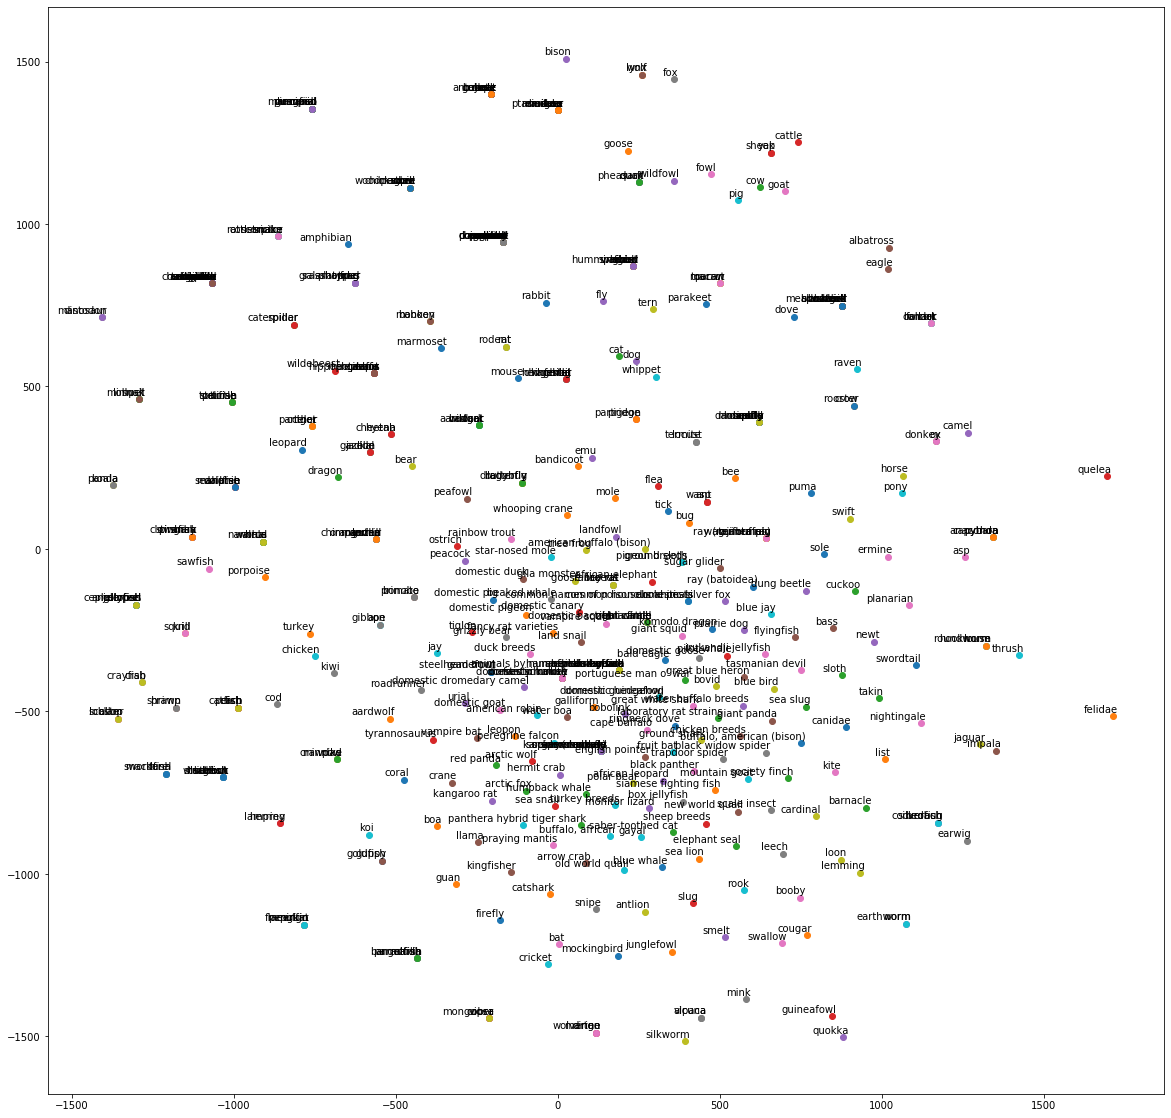

In [17]:
#plotting the words based on their vectors
tsne_plot(model)

In [18]:
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
new_values = tsne_model.fit_transform(tokens)
new_values

array([[ 8.88860901e+02, -5.49052185e+02],
       [ 1.71428455e+03, -5.14191406e+02],
       [ 1.88618439e+02,  5.92991577e+02],
       [ 7.41940918e+02,  1.25239978e+03],
       [ 2.41692368e+02,  5.78528625e+02],
       [ 1.16771106e+03,  3.32471405e+02],
       [ 7.02048218e+02,  1.10076196e+03],
       [ 6.41333618e+02,  3.31729088e+01],
       [ 1.06584680e+03,  2.25867737e+02],
       [ 5.56846313e+02,  1.07412781e+03],
       [-3.76118927e+01,  7.57382996e+02],
       [-1.55506725e+01, -2.59037415e+02],
       [ 4.93470154e+02, -5.19922913e+02],
       [ 4.57188568e+02, -8.44968811e+02],
       [ 5.73213684e+02, -4.81936066e+02],
       [ 5.63730225e+02, -5.76596802e+02],
       [-8.44544144e+01, -3.24275970e+02],
       [ 1.71399826e+02, -1.09449570e+02],
       [ 3.83453949e+02, -4.15627136e+01],
       [ 1.75363953e+02, -7.88256042e+02],
       [-2.43850235e+02,  3.79958679e+02],
       [-5.17795410e+02, -5.22525330e+02],
       [ 1.89040726e+02, -3.72512085e+02],
       [ 2.

In [24]:
coordinates = {}
for i in range(len(labels)):
    coordinates[labels[i]] = new_values[i].tolist()
coordinates['cat'][1]

592.9915771484375

In [ ]:
import math

In [80]:
#calculating distance between any two words
def distance(word1,word2):
    word1 = word1.lower()
    word2 = word2.lower()
    x = coordinates[word2][0] - coordinates[word1][0] 
    y = coordinates[word2][1] - coordinates[word1][1] 
    dist = math.hypot(x,y)
    return dist

Comparing distance between words:

In [109]:
print(distance('Pony','Horse'))
print(distance('Horse','Whippet'))

81.37408981298597
238.84791761149847


In [110]:
#using spaCy similarity function which doesn't give us the actual distance
word1 = nlp('Pony')
word2 = nlp('Horse')
word1.similarity(word2)

0.7371492652531151

In [32]:
word3 = nlp('Whippet')
word2.similarity(word3)

0.3323095647230472

In [78]:
distance('Quokka','Earwig')

1248.1693304241253

In [79]:
distance('Tick','Flea')

254.0772134971445

In [87]:
distance('Domestic rabbit','Rat')

839.2900229429431

Saving the dictionary of all coordinate data to a JSON file

In [27]:
import json
with open('animals_coord.json', 'w') as fp:
    json.dump(coordinates, fp)

In [25]:
#if you want to load the json file
# with open('animals_coord.json', 'r') as fp:
#     data = json.load(fp)